In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import math
import seaborn as sns

In [387]:
df = pd.read_csv("Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


##### General information about the dataset
 - AGE Numerical Value
 - ATTRITION Employee leaving the company (0=no, 1=yes)
 - BUSINESS TRAVEL (1=No Travel, 2=Travel Frequently, 3=Travel Rarely)
 - DAILY RATE Numerical Value - Salary Level
 - DEPARTMENT (1=HR, 2=R&D, 3=Sales)
 - DISTANCE FROM HOME Numerical Value - THE DISTANCE FROM WORK TO HOME
 - EDUCATION Numerical Value. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')
 - EDUCATION FIELD (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TECHNICAL)
 - EMPLOYEE COUNT Numerical Value
 - EMPLOYEE NUMBER Numerical Value - EMPLOYEE ID
 - ENVIRONMENT SATISFACTION Numerical Value - SATISFACTION WITH THE ENVIRONMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
 - GENDER (1=FEMALE, 2=MALE)
 - HOURLY RATE Numerical Value - HOURLY SALARY
 - JOB INVOLVEMENT Numerical Value - JOB INVOLVEMENT (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
 - JOB LEVEL Numerical Value - LEVEL OF JOB
 - JOB ROLE (1=HR REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= RESEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9= SALES REPRESENTATIVE)
 - JOB SATISFACTION Numerical Value - SATISFACTION WITH THE JOB (1 'Low' 2 'Medium' 3 'High' 4 'Very High')
 - MARITAL STATUS (1=DIVORCED, 2=MARRIED, 3=SINGLE)
 - MONTHLY INCOME Numerical Value - MONTHLY SALARY
 - MONTHLY RATE Numerical Value - MONTHLY RATE
 - NUMCOMPANIES WORKED Numerical Value - NO. OF COMPANIES WORKED AT
 - OVER 18 (1=YES, 2=NO)
 - OVERTIME (1=NO, 2=YES)
 - PERCENT SALARY HIKE Numerical Value - PERCENTAGE INCREASE IN SALARY
 - PERFORMANCE RATING Numerical Value - PERFORMANCE RATING
 - RELATIONS SATISFACTION Numerical Value - RELATIONS SATISFACTION
 - STANDARD HOURS Numerical Value - STANDARD HOURS
 - STOCK OPTIONS LEVEL Numerical Value - STOCK OPTIONS (Higher the number, the more stock option an employee has)
 - TOTAL WORKING YEARS Numerical Value - TOTAL YEARS WORKED
 - TRAINING TIMES LAST YEAR Numerical Value - HOURS SPENT TRAINING
 - WORK LIFE BALANCE Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE
 - YEARS AT COMPANY Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY
 - YEARS IN CURRENT ROLE Numerical Value -YEARS IN CURRENT ROLE
 - YEARS SINCE LAST PROMOTION Numerical Value - LAST PROMOTION
 - YEARS WITH CURRENT MANAGER Numerical Value - YEARS SPENT WITH CURRENT MANAGER

#### Check for missing data in the dataset

<AxesSubplot:>

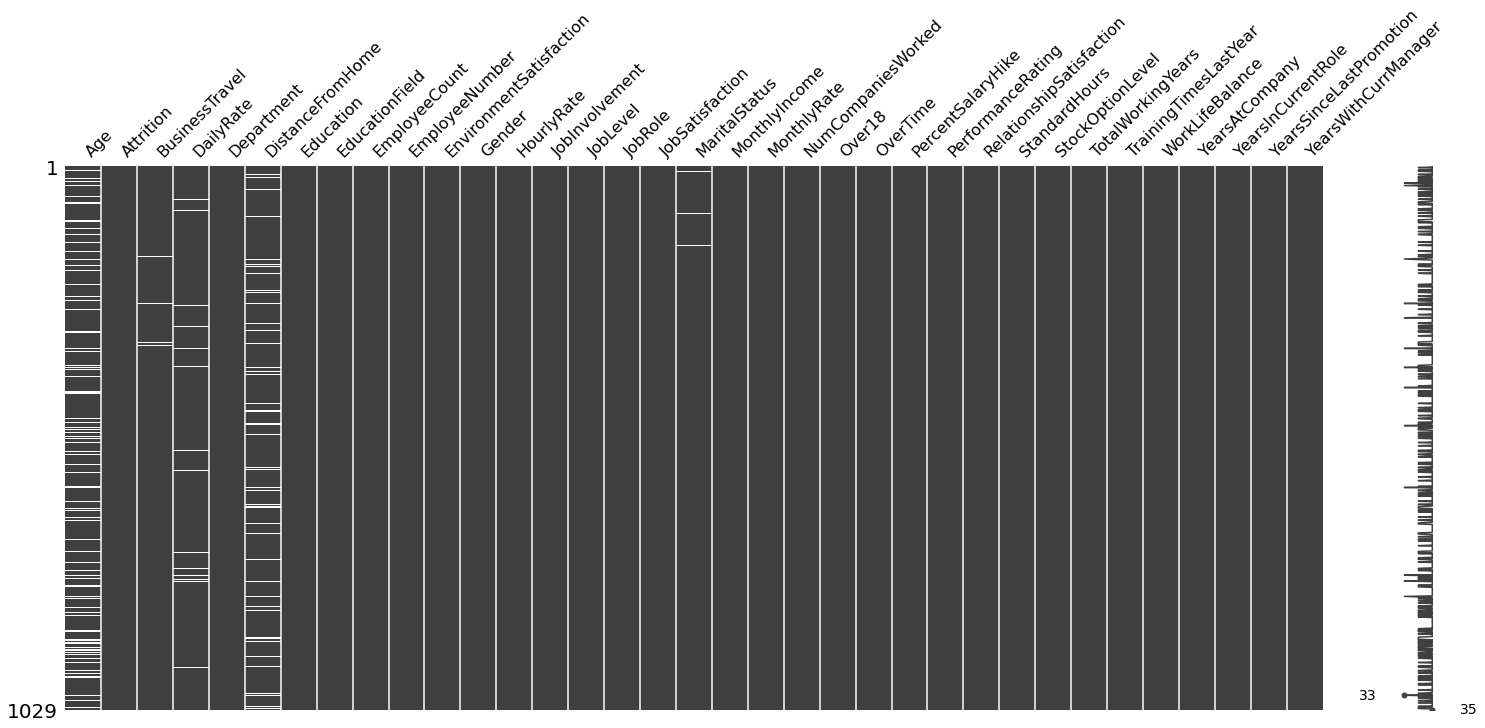

In [28]:
missingno.matrix(df)

In [29]:
# Check how many values are missing per column
df.isna().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

The "Age" column and "DistanceFromHome" columns have a significant amount of data that is missing, we can drop the raws with the missing data, since replacing the data of those columns can affect the purity of the dataset.

In [34]:
df = df.dropna(subset=['Age','DistanceFromHome'])

The missing values in the "BusinessTravel" columns can be replaced by the most frequent value in the column.

In [41]:
df['BusinessTravel'] = df['BusinessTravel'].fillna(df['BusinessTravel'].mode()[0])
print(f"Most frequent value : {df['BusinessTravel'].mode()[0]}")

Most frequent value : Travel_Rarely


To replace the missing values from the "DailyRate" column we can put the mean value of the daily rate depending on de "Department" column.

In [87]:
# Group the dataframe by the Department column and get the mean of the daily rate
dr_dep = df.groupby(by='Department')['DailyRate'].mean()

# Create an empty dictionary to put the values of mean for each depertment
mean_dict = {}
for i in range(len(dr_dep)):
    # Populate the dictionary with the values and also display the 
    mean_dict[dr_dep.index[i]] = dr_dep[i]
    print(f"{dr_dep.index[i]} - {dr_dep[i]}")

# Crete a function the for each row that has missing data in the DailyRate column adds the mean of the row.s department
def replace_by_department(row):
    if math.isnan(row.DailyRate):
        row.DailyRate = np.float64(int(ceva[row.Department]))
    return row

# Apply the function to the dataframe   
df = df.apply(replace_by_department,axis=1)


Human Resources - 767.0333333333333
Research & Development - 788.5694980694981
Sales - 784.7796610169491


In [102]:
df.MaritalStatus = df.MaritalStatus.fillna("Married")

##### Data Cleaning
There are columns in the dataset that either have the same value across the dataset or the data  is not relevant or can be used for analysis. Those columns will be droped from the dataframe.

In [189]:
# Drop the columns that have the same data across all rows.
df.drop(["EmployeeCount","StandardHours"],axis=1,inplace=True)

# Drop other columns that dont have relevant data or the data is too abstract
df.drop(["EmployeeNumber","Over18","RelationshipSatisfaction","WorkLifeBalance"],axis=1,inplace=True)

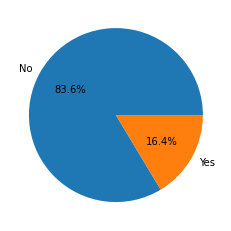

In [360]:
# View the amount of attrition across the entire dataset.
pie_plot = plt.pie(df['Attrition'].value_counts(),autopct='%1.1f%%', labels=['No', 'Yes'])

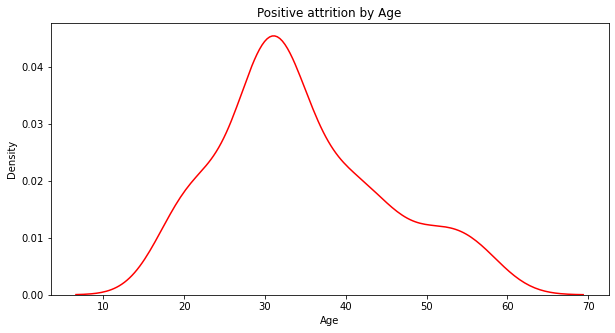

In [247]:
fig = plt.figure(figsize=(10,5))

sns.kdeplot(df[df['Attrition']=='Yes']['Age'],color='r')
plt.title('Positive attrition by Age')
plt.show()

The above plot shows that employees have an increasing rate of leaving their job until around 30.

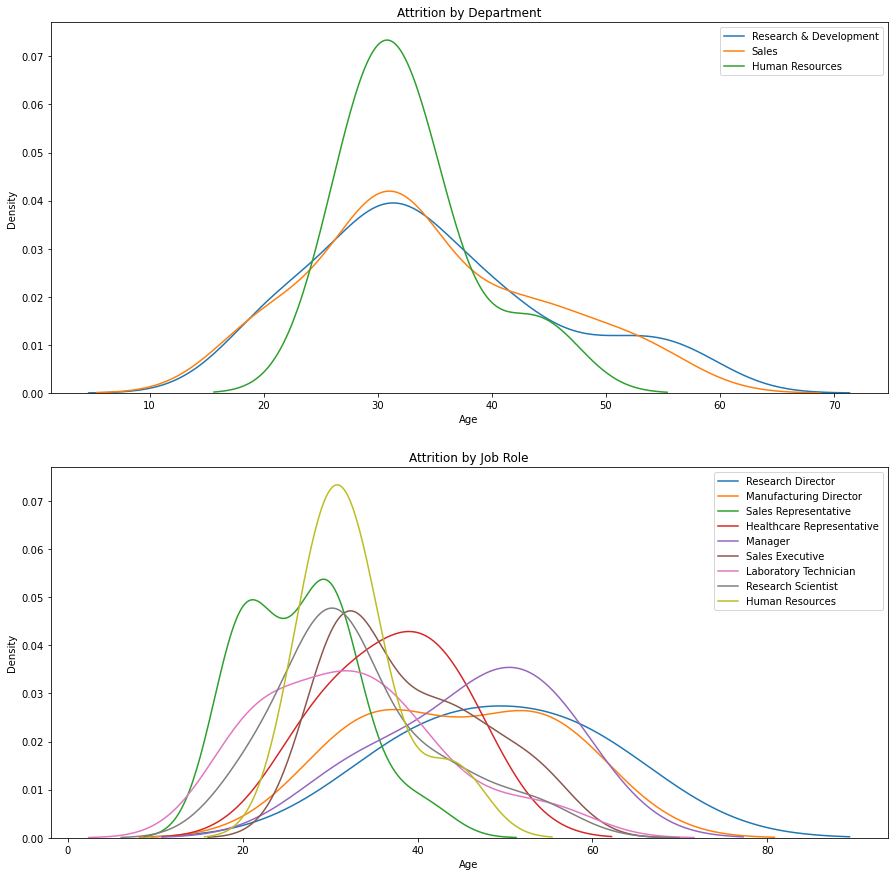

In [304]:
# Get a list of all job roles and departments 
departments = df['Department'].unique()
job_roles =  df['JobRole'].unique()


fig, ax = plt.subplots(2,figsize=(15, 15))

# Plot for each department role depending on age.
for  dep in departments:
    by_departments = df.loc[df['Department']==dep]
    sns.kdeplot(by_departments[by_departments['Attrition']=='Yes']['Age'],ax=ax[0])

# Plot for each job role depending on age.
for  role in job_roles:
    by_job_role = df.loc[df['JobRole']==role]
    sns.kdeplot(by_job_role[by_job_role['Attrition']=='Yes']['Age'],ax=ax[1])

ax[0].title.set_text('Attrition by Department')
ax[0].legend(labels=departments)
ax[1].title.set_text('Attrition by Job Role')
ax[1].legend(labels=job_roles)
plt.show()

The plots above show the Attrition per age depending on the department and the job role.
- By departments and job role the highest attrition is achieved by employees in Human Resources
- By job role a higher attrition is achived by younger employees that work as Sales Representatives
- Managers and Healthcare Representatives jobs achieve a high attrition rate  between 40 to 55.

<AxesSubplot:title={'center':'Attrition depepnding on the education level and education field'}, xlabel='Education', ylabel='count'>

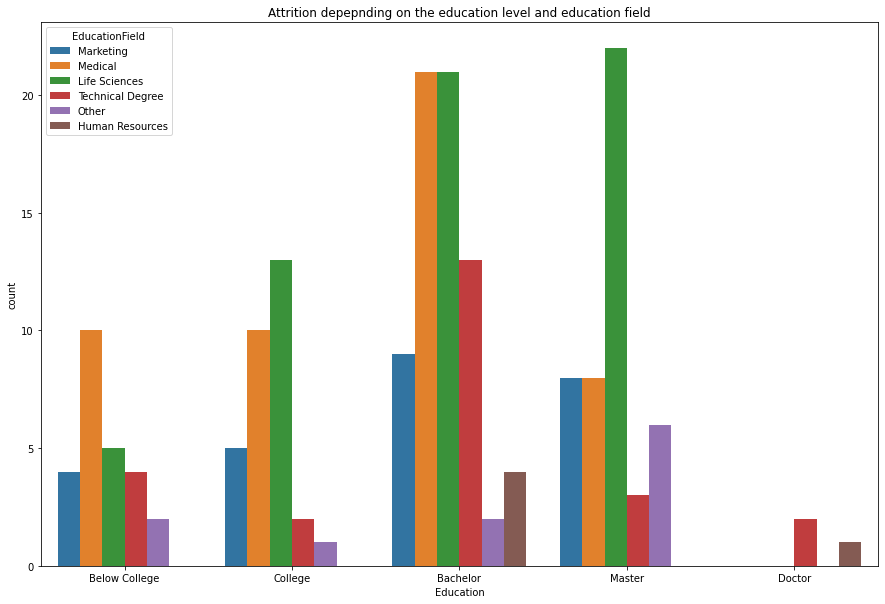

In [388]:
# Get only the values where attrition is yes
attrition_yes = df[df['Attrition']=='Yes']

fig = plt.figure(figsize=(15,10))
plot = sns.countplot(data=attrition_yes,x="Education",hue='EducationField')
labels = ['Below College','College','Bachelor','Master','Doctor']
plt.xticks([0,1,2,3,4],labels)
plt.title("Attrition depepnding on the education level and education field")
plot

The plot above shows the attrition rate depending on the education level in each education field
- Highest attrition rates are achieved in the Life Science field and Medical Field.
- There is an ascending trend in the Life Science field that shows that the higher the education  the higher the attrition rate
- Overall employees with a Bachelor or Master education have a higher attrition rate then the other levels of educations.

Text(0.5, 1.0, 'Attrition depepnding on the distance from work to home')

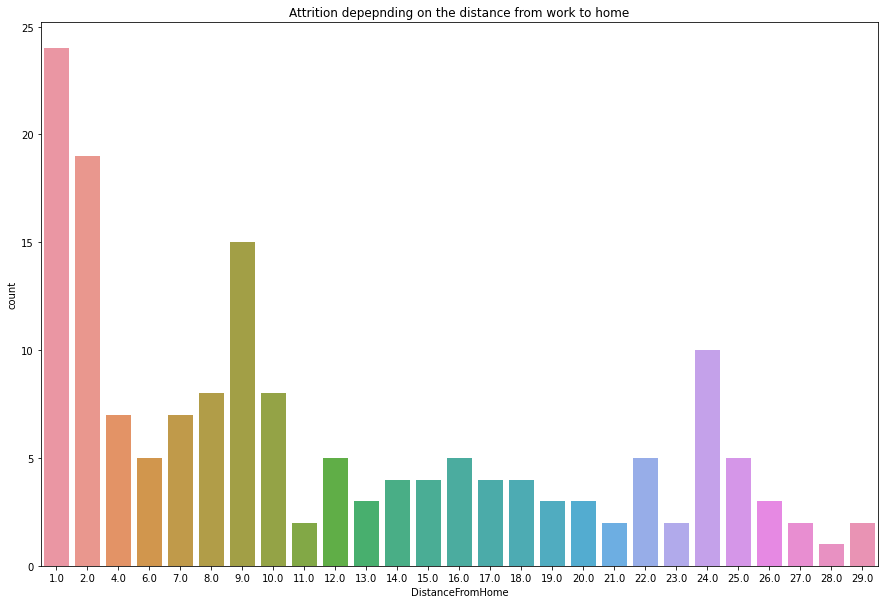

In [389]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x=attrition_yes[attrition_yes['Attrition']=='Yes']['DistanceFromHome'])
plt.title("Attrition depepnding on the distance from work to home")

This plot shows the number of employees with attrition  depending on the distance from work to home.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

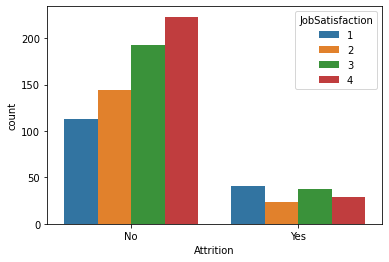

In [347]:
sns.countplot(data=df,x="Attrition",hue='JobSatisfaction')

In this plot is shown the employees attrition depending on their job satisfaction
- The higher the job satisfaction the lower of employees leaving

Text(0.5, 1.0, 'Attrition depending on Overtime')

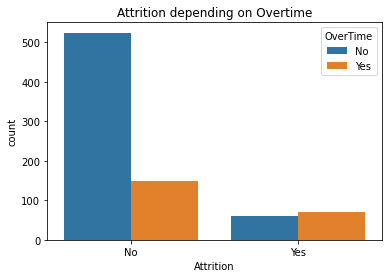

In [380]:
sns.countplot(data=df,x="Attrition",hue='OverTime')
plt.title("Attrition depending on Overtime")

Text(0.5, 1.0, 'Attrition depending on Stock Option Level')

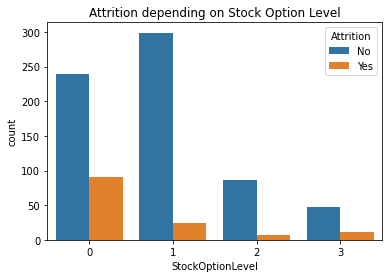

In [367]:
sns.countplot(data=df,x="StockOptionLevel",hue='Attrition')
plt.title("Attrition depending on Stock Option Level")

Text(0.5, 1.0, 'Attrition depending on Total working years')

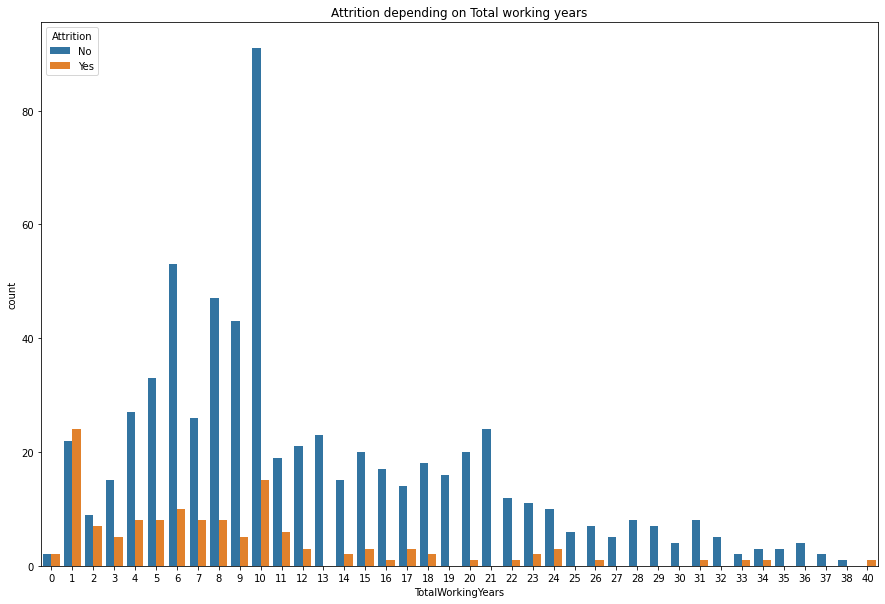

In [382]:
fig = plt.figure(figsize=(15,10))
sns.countplot(data=df,x="TotalWorkingYears",hue='Attrition')
plt.title("Attrition depending on Total working years")

The above plot shows the attrition depending on the total workign years
- Employees have a higher rate of leaving their job in the first 10 years.

Text(0.5, 1.0, 'Attrition depending on the years in current role')

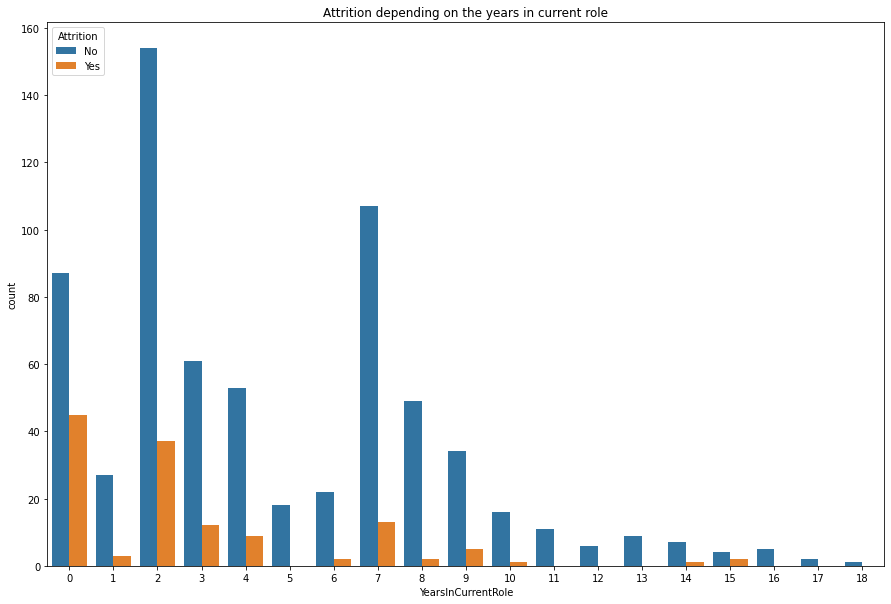

In [384]:
fig = plt.figure(figsize=(15,10))
sns.countplot(data=df,x="YearsInCurrentRole",hue='Attrition')
plt.title("Attrition depending on the years in current role")

Text(0.5, 1.0, 'Attrition depending on the number of years since last promotion')

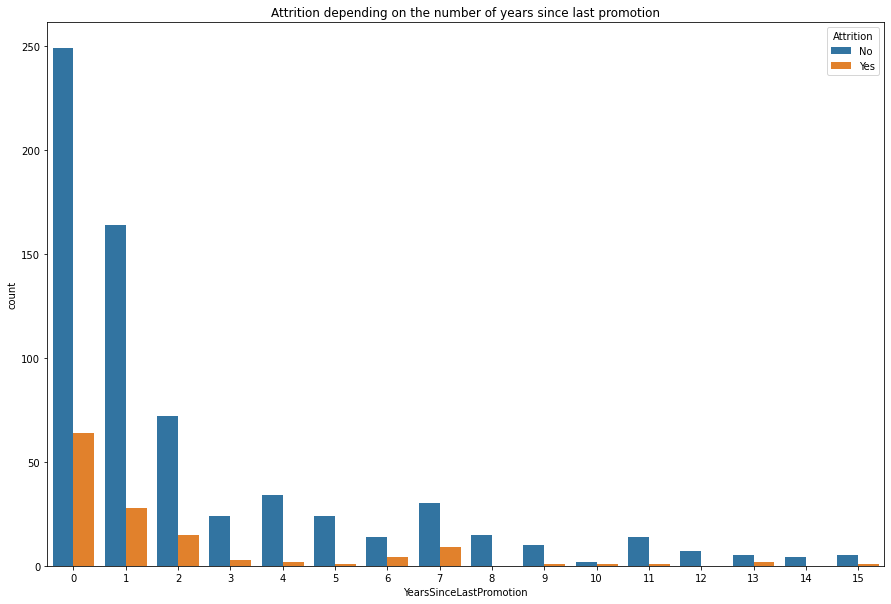

In [386]:
# 
fig = plt.figure(figsize=(15,10))
sns.countplot(data=df,x="YearsSinceLastPromotion",hue='Attrition')
plt.title("Attrition depending on the number of years since last promotion")